#**“End-to-End Customer Churn Prediction”**

**This project focuses on building an end-to-end machine learning model to predict customer churn by analyzing customer demographics, service usage, and billing information, enabling businesses to take proactive actions to improve customer retention.**

# **Data Dictionary**
The dataset used in this project contains customer demographic information, service usage details, and billing-related attributes. Each feature plays an important role in understanding customer behavior and predicting churn.


1.   CustomerID :-Unique identifier assigned to each customer(used only for identification, not for prediction).

---



2.   Gender :-Gender of the customer (Male / Female).

---


3.   SeniorCitizen :-Indicates whether the customer is a senior citizen (1 = Yes, 0 = No).

---



4.   Partner :-Whether the customer has a partner (Yes / No).

---



5.   Dependents :-Whether the customer has dependents (Yes / No).

---



6.   Tenure :-Number of months the customer has stayed with the company.

---



7.   PhoneService :-Whether the customer has subscribed to phone services (Yes / No).

---


8.   InternetService :-Type of internet service subscribed (DSL / Fiber optic / None).

---




9.   Contract :-Type of contract the customer has (Month-to-month / One year / Two year).

---




10.   PaperlessBilling :-Whether the customer uses paperless billing (Yes / No).

---




11.   PaymentMethod :-Method of payment used by the customer (Electronic check, Mailed check, Bank transfer, Credit card).

---




12.   MonthlyCharges :-Amount charged to the customer on a monthly basis.

---




13.   TotalCharges :-Total amount charged to the customer over the entire tenure.

---




14.   Churn :-Indicates whether the customer has churned (Yes / No).

---


In [ ]:
 #Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the dataset
df = pd.read_csv('customer_churn.csv')
df

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,Male,0,No,No,48,Yes,DSL,Month-to-month,Yes,Mailed check,49.29,2359.49,No
1,2,Female,0,No,No,15,No,Fiber optic,Two year,No,Bank transfer,85.99,1209.60,No
2,3,Male,0,Yes,No,3,Yes,DSL,Month-to-month,No,Credit card,35.93,59.42,Yes
3,4,Male,0,Yes,No,3,Yes,DSL,Month-to-month,No,Electronic check,113.97,337.36,Yes
4,5,Male,0,Yes,No,64,Yes,DSL,Two year,Yes,Electronic check,105.82,6806.51,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,299996,Female,1,No,No,37,No,Fiber optic,Two year,No,Credit card,94.82,3545.88,No
299996,299997,Male,0,No,No,9,No,Fiber optic,One year,Yes,Mailed check,21.20,190.37,No
299997,299998,Female,0,Yes,No,15,Yes,No,Two year,No,Bank transfer,53.99,886.24,No
299998,299999,Female,0,Yes,Yes,21,Yes,DSL,One year,No,Bank transfer,88.08,1789.67,No


# **Data Processing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CustomerID        300000 non-null  int64  
 1   Gender            300000 non-null  object 
 2   SeniorCitizen     300000 non-null  int64  
 3   Partner           300000 non-null  object 
 4   Dependents        300000 non-null  object 
 5   Tenure            300000 non-null  int64  
 6   PhoneService      300000 non-null  object 
 7   InternetService   300000 non-null  object 
 8   Contract          300000 non-null  object 
 9   PaperlessBilling  300000 non-null  object 
 10  PaymentMethod     300000 non-null  object 
 11  MonthlyCharges    285000 non-null  float64
 12  TotalCharges      285000 non-null  float64
 13  Churn             300000 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 32.0+ MB


In [ ]:
df.describe()

,CustomerID,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,300000.000000,300000.000000,300000.000000,285000.000000,285000.000000
mean,150000.500000,0.150013,35.517103,70.033689,2485.454276
std,86602.684716,0.357085,20.785990,28.874331,1879.289287
min,1.000000,0.000000,0.000000,20.000000,-187.560000
25%,75000.750000,0.000000,17.000000,45.000000,977.087500
50%,150000.500000,0.000000,36.000000,70.080000,2044.075000
75%,225000.250000,0.000000,54.000000,95.030000,3662.222500
max,300000.000000,1.000000,71.000000,120.000000,8610.400000


In [ ]:
# Checking the shape of the datset
df.shape

(300000, 14)

In [ ]:
# Removing the customerID column
# Drop identifier column
df = df.drop(columns=["CustomerID"])

In [ ]:
#Checking for duplicate values
df.duplicated().sum()

np.int64(3)

In [ ]:
#Removing the duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
#checking the missing values
df.isnull().sum()/len(df)*100

,0
Gender,0.00000
SeniorCitizen,0.00000
Partner,0.00000
Dependents,0.00000
Tenure,0.00000
PhoneService,0.00000
InternetService,0.00000
Contract,0.00000
PaperlessBilling,0.00000
PaymentMethod,0.00000


**Standard guidlines**


1.   Greater than 40% Remove the columns.

1.   If 4% to 40% than fill the columns.
2.   Less than 4% Remove the Rows.


In [ ]:
#As the numerical columns contain missing values and may include outliers,
# the missing values are filled using the median to maintain data consistency.
df["MonthlyCharges"] = df["MonthlyCharges"].fillna(df["MonthlyCharges"].median())
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [ ]:
#checking the missing values after filling the null values
df.isnull().sum()/len(df)*100

,0
Gender,0.0
SeniorCitizen,0.0
Partner,0.0
Dependents,0.0
Tenure,0.0
PhoneService,0.0
InternetService,0.0
Contract,0.0
PaperlessBilling,0.0
PaymentMethod,0.0


In [ ]:
#checking number of unique values in each column
df.nunique()

,0
Gender,2
SeniorCitizen,2
Partner,2
Dependents,2
Tenure,72
PhoneService,2
InternetService,3
Contract,3
PaperlessBilling,2
PaymentMethod,4


In [ ]:
#Checking the unique values in each column
cols = df.columns
for i in cols:
  print(i, df[i].unique(), '\n')

Gender ['Male' 'Female'] 

SeniorCitizen [0 1] 

Partner ['No' 'Yes'] 

Dependents ['No' 'Yes'] 

Tenure [48 15  3 64 69 17 26 51 27 16 11 23 53 37 60 62 35 33  7 32 39 67 68 50
 44 70 13 42 63 25 52 40 30 24 19  8 49 61 56 21 43 47  2 10  4 34  5 22
  0 18  9 59 14 29 20 71 28  1 66 46 65 31 57 55 54 38 36 45 58  6 41 12] 

PhoneService ['Yes' 'No'] 

InternetService ['DSL' 'Fiber optic' 'No'] 

Contract ['Month-to-month' 'Two year' 'One year'] 

PaperlessBilling ['Yes' 'No'] 

PaymentMethod ['Mailed check' 'Bank transfer' 'Credit card' 'Electronic check'] 

MonthlyCharges [49.29 85.99 35.93 ... 75.46 40.93 67.78] 

TotalCharges [2359.49 1209.6    59.42 ... 3545.88  886.24 1789.67] 

Churn ['No' 'Yes'] 



# **Exploratory Data Analysis**
In the exploratory data analysis (EDA) phase, the dataset is visualized to gain a deeper understanding of the data and to identify any underlying trends or patterns. The analysis begins by examining the distribution of the target variable to understand customer churn behavior. Subsequently, relationships between independent variables and the target variable are analyzed using different visualizations to uncover key factors influencing customer churn.

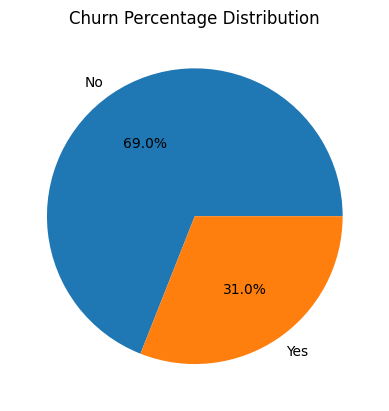

In [ ]:
#1. Churn Percentage Distribution (Pie Chart)
churn_counts = df["Churn"].value_counts()
plt.figure()
plt.pie(churn_counts, labels=churn_counts.index, autopct="%1.1f%%")
plt.title("Churn Percentage Distribution")
plt.show()

This chart shows the overall proportion of customers who have churned versus those who have remained with the company.

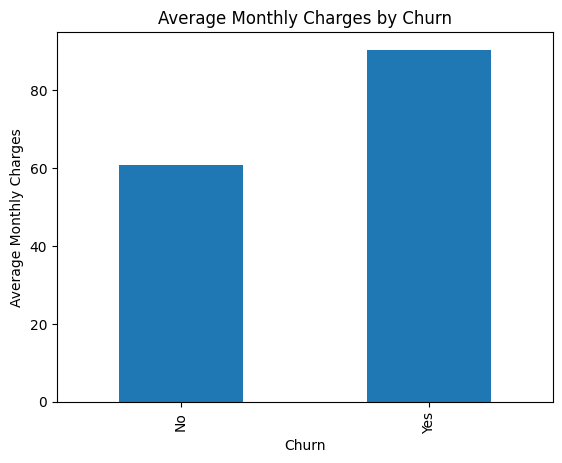

In [ ]:
#2. Average Monthly Charges by Churn (Bar Chart)
avg_monthly = df.groupby("Churn")["MonthlyCharges"].mean()
plt.figure()
avg_monthly.plot(kind="bar")
plt.xlabel("Churn")
plt.ylabel("Average Monthly Charges")
plt.title("Average Monthly Charges by Churn")
plt.show()

This chart compares the average monthly charges of churned and non-churned customers, highlighting the impact of billing on churn behavior.

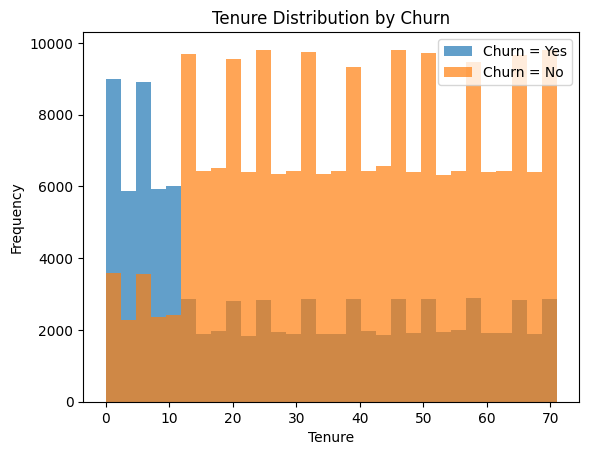

In [ ]:
#3. Tenure Distribution by Churn (Histogram Overlay)
plt.figure()
plt.hist(df[df["Churn"] == "Yes"]["Tenure"], bins=30, alpha=0.7, label="Churn = Yes")
plt.hist(df[df["Churn"] == "No"]["Tenure"], bins=30, alpha=0.7, label="Churn = No")
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.title("Tenure Distribution by Churn")
plt.legend()
plt.show()

This chart illustrates the distribution of customer tenure for churned and retained customers, showing that customers with shorter tenure are more likely to churn.

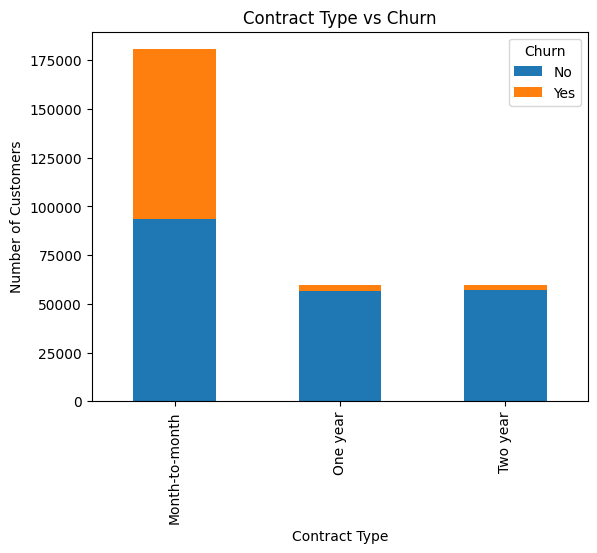

In [ ]:
#4. Contract Type vs Churn (Stacked Bar Chart)
contract_churn = pd.crosstab(df["Contract"], df["Churn"])
contract_churn.plot(kind="bar", stacked=True)
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.title("Contract Type vs Churn")
plt.show()

This chart shows the relationship between contract type and churn, indicating higher churn among customers with month-to-month contracts.

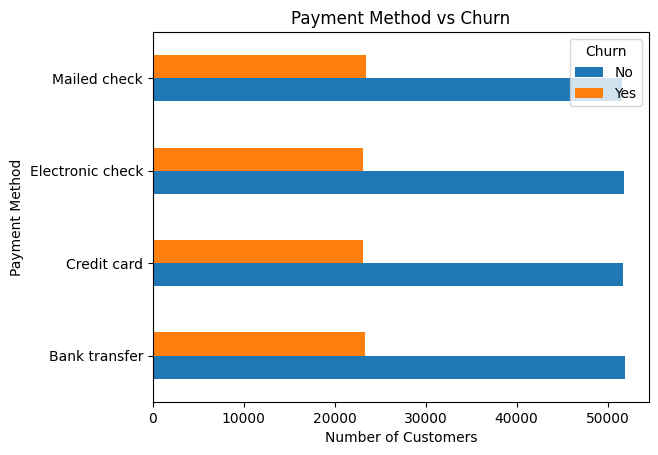

In [ ]:
#5. Payment Method vs Churn (Horizontal Bar Chart)
payment_churn = pd.crosstab(df["PaymentMethod"], df["Churn"])
payment_churn.plot(kind="barh")
plt.xlabel("Number of Customers")
plt.ylabel("Payment Method")
plt.title("Payment Method vs Churn")
plt.show()

This chart visualizes churn behavior across different payment methods, helping identify payment patterns associated with higher churn.

# **Outlier Detection And Treatment**
Outliers are extreme data points that deviate significantly from the normal distribution of the dataset and may adversely affect the performance of machine learning models. Therefore, outlier analysis is performed to identify and handle such values in order to improve data quality and ensure reliable model training.

In [ ]:
# Function to detect outliers
def detect_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

MonthlyCharges Outlier Bounds: -24.720000000000006 164.72000000000003


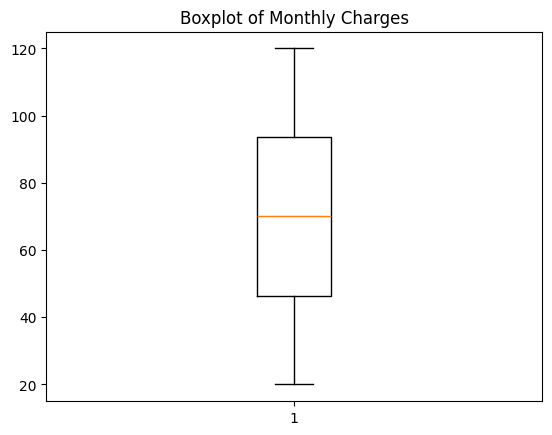

In [ ]:
# Outlier detection for MonthlyCharges
low_mc, high_mc = detect_outliers_iqr("MonthlyCharges")
print("MonthlyCharges Outlier Bounds:", low_mc, high_mc)
plt.figure()
plt.boxplot(df["MonthlyCharges"])
plt.title("Boxplot of Monthly Charges")
plt.show()

TotalCharges Outlier Bounds: -2754.535 7339.584999999999


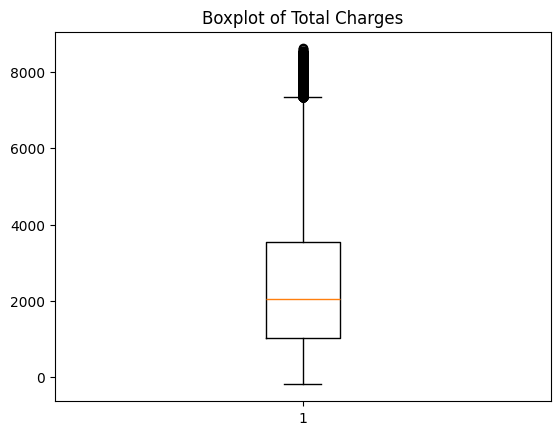

In [ ]:
# Outlier detection for TotalCharges
low_tc, high_tc = detect_outliers_iqr("TotalCharges")
print("TotalCharges Outlier Bounds:", low_tc, high_tc)
plt.figure()
plt.boxplot(df["TotalCharges"])
plt.title("Boxplot of Total Charges")
plt.show()


In [ ]:
# Treating the outliers
# Treat (cap) outliers
df["TotalCharges"] = df["TotalCharges"].clip(lower=low_tc, upper=high_tc)

In [ ]:
# Verify
df["TotalCharges"].describe()

,TotalCharges
count,299997.000000
mean,2458.290321
std,1819.766557
min,-187.560000
25%,1030.760000
50%,2044.075000
75%,3554.290000
max,7339.585000


TotalCharges Outlier Bounds: -2754.535 7339.584999999999


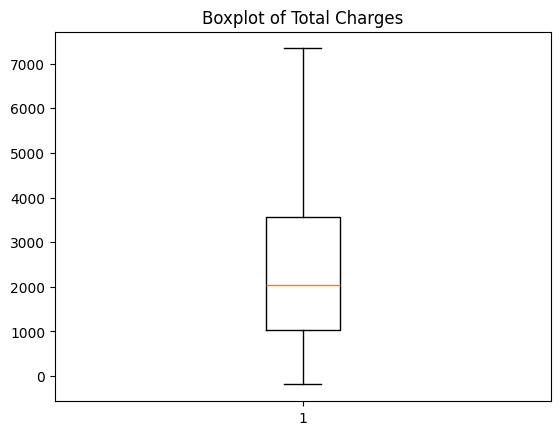

In [ ]:
# After treating the outliers
low_tc, high_tc = detect_outliers_iqr("TotalCharges")
print("TotalCharges Outlier Bounds:", low_tc, high_tc)
plt.figure()
plt.boxplot(df["TotalCharges"])
plt.title("Boxplot of Total Charges")
plt.show()

After performing outlier analysis, it was observed that outliers were present only in the TotalCharges column. These outliers were handled using the IQR-based capping method, which limits extreme values within acceptable bounds without removing any records. This treatment helps maintain data consistency and prevents outliers from negatively influencing the model performance.

Tenure Outlier Bounds: -38.5 109.5


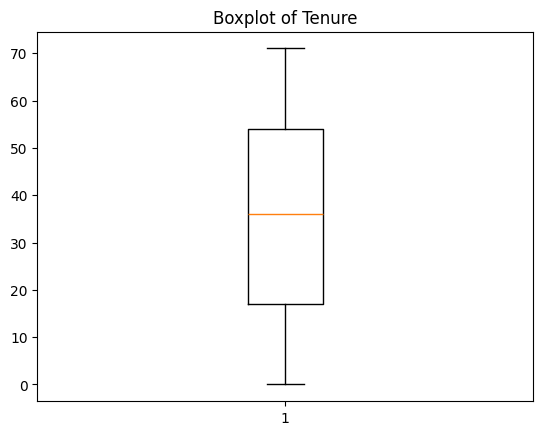

In [ ]:
# Outlier detection for Tenure
low_t, high_t = detect_outliers_iqr("Tenure")
print("Tenure Outlier Bounds:", low_t, high_t)
plt.figure()
plt.boxplot(df["Tenure"])
plt.title("Boxplot of Tenure")
plt.show()

#  **Feature Engineering**
Feature engineering is the process of transforming and creating new features from existing data to enhance the learning capability of machine learning models. This step helps in capturing hidden patterns and improving model accuracy by providing more informative inputs to the algorithms.

In [ ]:
# Tenure Group
df["TenureGroup"] = pd.cut(
    df["Tenure"],
    bins=[0, 12, 24, 48, 72],
    labels=["0-1 Year", "1-2 Years", "2-4 Years", "4-6 Years"])

In [ ]:
# Verify
df[["Tenure", "TenureGroup"]].head()

,Tenure,TenureGroup
0,48,2-4 Years
1,15,1-2 Years
2,3,0-1 Year
3,3,0-1 Year
4,64,4-6 Years


The tenure group feature was created by categorizing customers based on the length of time they have stayed with the company. This helps in understanding churn behavior across different stages of the customer lifecycle, as customers with shorter tenure are generally more likely to churn compared to long-term customers.

In [ ]:
# High Monthly Charges Flag
df["HighMonthlyCharges"] = (df["MonthlyCharges"] > df["MonthlyCharges"].median()).astype(int)

In [ ]:
# Verify
df[["MonthlyCharges", "HighMonthlyCharges"]].head()

,MonthlyCharges,HighMonthlyCharges
0,49.29,0
1,85.99,1
2,35.93,0
3,113.97,1
4,105.82,1


This feature identifies customers with monthly charges higher than the median value. It helps capture the impact of higher billing amounts on customer churn, as customers paying higher charges are more likely to discontinue the service.

In [ ]:
# Long-Term Customer Flag
df["LongTermCustomer"] = (df["Tenure"] >= 24).astype(int)

In [ ]:
df[["Tenure", "LongTermCustomer"]].head()

,Tenure,LongTermCustomer
0,48,1
1,15,0
2,3,0
3,3,0
4,64,1


This feature indicates whether a customer has been associated with the company for a long duration. Long-term customers generally show higher loyalty and a lower likelihood of churn, making this feature useful for churn prediction.

In [ ]:
# Average Charges per Tenure
df["AvgChargesPerTenure"] = df["TotalCharges"] / (df["Tenure"] + 1)

In [ ]:
# Verify
df[["TotalCharges", "Tenure", "AvgChargesPerTenure"]].head()

,TotalCharges,Tenure,AvgChargesPerTenure
0,2359.49,48,48.152857
1,1209.60,15,75.600000
2,59.42,3,14.855000
3,337.36,3,84.340000
4,6806.51,64,104.715538


This feature represents the average amount a customer spends over their tenure with the company. It helps capture customer spending behavior more effectively by combining total charges and tenure into a single meaningful metric.

In [ ]:
# Service Count
service_columns = [
    "PhoneService",
    "InternetService",
    "PaperlessBilling"]

df["ServiceCount"] = df[service_columns].apply(
    lambda x: x.astype(str).str.lower().isin(["yes", "dsl", "fiber optic"]).sum(),
    axis=1)

This feature represents the total number of services subscribed to by a customer. Customers with a higher number of subscribed services are generally more engaged and less likely to churn, making this feature useful for predicting customer retention.

# **Categorical Variable Encoding**
**Label Encoding**

**One-Hot Encoding**

Machine learning algorithms require numerical input data for model training. Since the dataset contains several categorical features, encoding techniques are applied to convert these categorical variables into numerical form. Binary categorical variables are encoded using label encoding, while multi-category variables are transformed using appropriate encoding methods to preserve their information and avoid introducing bias into the model.

In [ ]:
# Label Encoding for Binary Columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
binary_columns = ["Gender","Partner","Dependents","PhoneService","PaperlessBilling","Churn"]
for col in binary_columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Verify
df[binary_columns].head()

,Gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,1,0,0,1,1,0
1,0,0,0,0,0,0
2,1,1,0,1,0,1
3,1,1,0,1,0,1
4,1,1,0,1,1,0


Label encoding is applied to binary categorical variables to convert their categories into numerical values. Since these features contain only two possible categories, they are encoded as 0 and 1, which allows machine learning models to process them efficiently without losing information.

In [ ]:
# One-Hot Encoding for Multi-Category Columns
multi_category_columns = ["InternetService","Contract","PaymentMethod","TenureGroup"]
df = pd.get_dummies(df,columns=multi_category_columns,drop_first=True)

In [ ]:
# Verify
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_1-2 Years,TenureGroup_2-4 Years,TenureGroup_4-6 Years
0,1,0,0,0,48,1,1,49.29,2359.49,0,...,False,False,False,False,False,False,True,False,True,False
1,0,0,0,0,15,0,0,85.99,1209.60,0,...,True,False,False,True,False,False,False,True,False,False
2,1,0,1,0,3,1,0,35.93,59.42,1,...,False,False,False,False,True,False,False,False,False,False
3,1,0,1,0,3,1,0,113.97,337.36,1,...,False,False,False,False,False,True,False,False,False,False
4,1,0,1,0,64,1,1,105.82,6806.51,0,...,False,False,False,True,False,True,False,False,False,True


One-hot encoding is used to convert categorical variables with multiple categories into numerical form. Each category is represented as a separate binary column indicating the presence or absence of that category. This approach prevents the model from assuming any ordinal relationship between categories and ensures fair representation of all categorical values.

# **Feature Scaling**

Feature scaling is applied to standardize the numerical features so that they have a mean of zero and a standard deviation of one. This ensures that all features contribute equally to the model training process and prevents variables with larger magnitudes from dominating the learning algorithm.

In [ ]:
# Feature Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
# Separate features and target
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [ ]:
# Initialize scaler
scaler = StandardScaler()

In [ ]:
# Scale features
X_scaled = scaler.fit_transform(X)

In [ ]:
# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
# Verify
X_scaled.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,HighMonthlyCharges,...,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_1-2 Years,TenureGroup_2-4 Years,TenureGroup_4-6 Years
0,1.001157,-0.420108,-0.999857,-1.002607,0.600539,1.003423,0.998638,-0.737156,-0.054293,-0.951180,...,-0.707918,-0.706253,-0.498086,-0.498518,-0.576405,-0.576815,1.731224,-0.447179,1.413461,-0.685579
1,-0.998844,-0.420108,-0.999857,-1.002607,-0.987071,-0.996589,-1.001364,0.566884,-0.686183,1.051326,...,1.412592,-0.706253,-0.498086,2.005944,-0.576405,-0.576815,-0.577626,2.236242,-0.707483,-0.685579
2,1.001157,-0.420108,1.000143,-1.002607,-1.564384,1.003423,-1.001364,-1.211869,-1.318232,-0.951180,...,-0.707918,-0.706253,-0.498086,-0.498518,1.734892,-0.576815,-0.577626,-0.447179,-0.707483,-0.685579
3,1.001157,-0.420108,1.000143,-1.002607,-1.564384,1.003423,-1.001364,1.561081,-1.165498,1.051326,...,-0.707918,-0.706253,-0.498086,-0.498518,-0.576405,1.733657,-0.577626,-0.447179,-0.707483,-0.685579
4,1.001157,-0.420108,1.000143,-1.002607,1.370290,1.003423,0.998638,1.271492,2.389442,1.051326,...,-0.707918,-0.706253,-0.498086,2.005944,-0.576405,1.733657,-0.577626,-0.447179,-0.707483,1.458621


In this step, the dataset is divided into features and the target variable. The StandardScaler is then applied to the feature set to standardize all numerical values by centering them around zero with a unit standard deviation. This ensures uniform feature scaling and improves the performance of machine learning algorithms that are sensitive to feature magnitude.

# **Train–Test Split**
The dataset is divided into training and testing sets to evaluate the model’s performance on unseen data. The training set is used to build the model, while the test set is used to assess its generalization ability. Stratified splitting is applied to preserve the original class distribution of the target variable.

In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42,stratify=y)   # Maintains the same churn ratio in train and test sets

# Verify shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (239997, 23)
X_test shape: (60000, 23)
y_train shape: (239997,)
y_test shape: (60000,)


In this step, the dataset is split into training and testing subsets to evaluate the model’s performance on unseen data. The model is trained using the training set and tested using the test set to assess its predictive ability. Stratified sampling is used to maintain the same proportion of churned and non-churned customers in both datasets, ensuring reliable and unbiased evaluation.

# **Model Building**
Model building is the process of training machine learning algorithms on the prepared dataset to learn patterns and relationships between the input features and the target variable. In this project, multiple classification models are developed and evaluated to predict customer churn, starting with a baseline model and progressing to more advanced models to improve predictive performance.

In [ ]:
# Model 1: Logistic Regression
from sklearn.linear_model import LogisticRegression
# Initialize model
log_reg = LogisticRegression(max_iter=1000)
# Train model
log_reg.fit(X_train, y_train)
# Predictions
y_pred_lr = log_reg.predict(X_test)

In this step, Logistic Regression is used as the baseline classification model for predicting customer churn. The model is initialized and trained using the training dataset, where it learns the relationship between input features and the target variable. After training, the model is used to generate predictions on the test dataset to evaluate its performance on unseen data.

In [ ]:
# Logistic Regression – Model Evaluation Code
# Evaluation Metrics for Logistic Regression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve)
# Accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
# ROC-AUC Score
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob_lr)


In [ ]:
# Print results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

print("\nConfusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.9724833333333334
Precision: 0.9430005752235527
Recall: 0.9698289770893836
F1 Score: 0.9562266352042845
ROC-AUC Score: 0.9925978561116812

Confusion Matrix:
 [[40316  1090]
 [  561 18033]]

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     41406
           1       0.94      0.97      0.96     18594

    accuracy                           0.97     60000
   macro avg       0.96      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000



In this step, multiple evaluation metrics are used to assess the performance of the Logistic Regression model. Accuracy measures the overall correctness of predictions, while precision, recall, and F1-score provide a deeper understanding of the model’s ability to correctly identify churned customers. The confusion matrix summarizes correct and incorrect predictions, and the ROC–AUC score evaluates the model’s ability to distinguish between churned and non-churned customers across different threshold values. This comprehensive evaluation ensures a reliable assessment of model performance.

In [ ]:
# Model 2: Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize model
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5)

# Train model
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

Decision Tree is a supervised machine learning algorithm that splits the data into subsets based on feature values to make predictions. In this project, the Decision Tree model is trained to capture non-linear relationships between customer features and churn behavior. Limiting the tree depth helps prevent overfitting and improves generalization.

In [ ]:
# Decision Tree – Model Evaluation Code
# Evaluation Metrics for Decision Tree
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score)
# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
# Precision, Recall, F1-score
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
# ROC-AUC Score
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

In [ ]:
# Print results
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Precision:", precision_dt)
print("Decision Tree Recall:", recall_dt)
print("Decision Tree F1 Score:", f1_dt)
print("Decision Tree ROC-AUC Score:", roc_auc_dt)

print("\nConfusion Matrix:\n", cm_dt)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9934833333333334
Decision Tree Precision: 0.9794047932578351
Decision Tree Recall: 1.0
Decision Tree F1 Score: 0.9895952526677133
Decision Tree ROC-AUC Score: 0.9997176586483024

Confusion Matrix:
 [[41015   391]
 [    0 18594]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     41406
           1       0.98      1.00      0.99     18594

    accuracy                           0.99     60000
   macro avg       0.99      1.00      0.99     60000
weighted avg       0.99      0.99      0.99     60000



The performance of the Decision Tree model is evaluated using multiple classification metrics. Accuracy provides an overall measure of correctness, while precision, recall, and F1-score offer deeper insights into the model’s ability to correctly identify churned customers. The confusion matrix summarizes prediction outcomes, and the ROC–AUC score measures the model’s capability to distinguish between churned and non-churned customers. These metrics collectively help assess the effectiveness and reliability of the Decision Tree model.

In [ ]:
# Model 3: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=7,
    random_state=42)

# Train model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

In this step, a Random Forest classifier is used to predict customer churn. Random Forest is an ensemble model that combines multiple decision trees to improve accuracy and reduce overfitting. The model is trained on the training dataset, where each tree learns patterns from random subsets of features and samples. After training, predictions are made on the test dataset to evaluate the model’s performance on unseen data.

In [ ]:
# Random Forest – Model Evaluation Code
# Evaluation Metrics for Random Forest

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Precision, Recall, F1-score
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# ROC-AUC Score
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)


The Random Forest model is evaluated using multiple classification metrics to measure its predictive performance. Accuracy indicates the overall correctness of predictions, while precision, recall, and F1-score provide insights into how well the model identifies churned customers. The confusion matrix summarizes the correct and incorrect predictions, and the ROC–AUC score evaluates the model’s ability to distinguish between churned and non-churned customers. This comprehensive evaluation ensures the Random Forest model is both accurate and reliable for churn prediction.

In [ ]:
# Model 4: XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss')  # keep this


In this step, the XGBoost classifier is initialized with 100 trees (n_estimators=100), a maximum tree depth of 5 (max_depth=5), and a learning rate of 0.1 (learning_rate=0.1). The random_state ensures reproducibility, and eval_metric='logloss' specifies the evaluation metric for training. These parameters control the complexity and learning speed of the model to achieve accurate and stable predictions for customer churn.

In [ ]:
from xgboost import XGBClassifier

# Initialize model
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'
)

# Train model (IMPORTANT)
xgb_model.fit(X_train, y_train)

# Now predictions
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

In [ ]:
#XGBoost – Model Evaluation Code
# Evaluation Metrics for XGBoost

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score)

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Precision, Recall, F1-score
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# ROC-AUC Score
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

In [ ]:
# Print results
print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Precision:", precision_xgb)
print("XGBoost Recall:", recall_xgb)
print("XGBoost F1 Score:", f1_xgb)
print("XGBoost ROC-AUC Score:", roc_auc_xgb)

print("\nConfusion Matrix:\n", cm_xgb)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9927833333333334
XGBoost Precision: 0.9790051168433824
XGBoost Recall: 0.9981176723674303
XGBoost F1 Score: 0.988469015472291
XGBoost ROC-AUC Score: 0.9996881737714226

Confusion Matrix:
 [[41008   398]
 [   35 18559]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     41406
           1       0.98      1.00      0.99     18594

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000



The XGBoost model is evaluated using multiple classification metrics to assess its predictive performance. Accuracy measures the overall correctness of predictions, while precision, recall, and F1-score provide insight into the model’s ability to correctly identify churned customers. The confusion matrix summarizes correct and incorrect predictions, and the ROC–AUC score evaluates the model’s capability to distinguish between churned and non-churned customers. This comprehensive evaluation ensures that the XGBoost model is both accurate and reliable for churn prediction.

# **model comparison**

The performance of all trained models is compared using key evaluation metrics including accuracy, precision, recall, F1-score, and ROC–AUC. This comparison allows us to identify which model performs best in predicting customer churn. Models like Random Forest and XGBoost typically outperform simpler models due to their ability to capture complex patterns, while Logistic Regression serves as a baseline. By comparing these metrics, we can select the most reliable model for deployment.

In [ ]:
# Create a dictionary with metrics for each model
model_metrics = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": [accuracy, accuracy_dt, accuracy_rf, accuracy_xgb],
    "Precision": [precision, precision_dt, precision_rf, precision_xgb],
    "Recall": [recall, recall_dt, recall_rf, recall_xgb],
    "F1-Score": [f1, f1_dt, f1_rf, f1_xgb],
    "ROC-AUC": [roc_auc, roc_auc_dt, roc_auc_rf, roc_auc_xgb]
}

# Convert to DataFrame
comparison_df = pd.DataFrame(model_metrics)

# Display the comparison table
comparison_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.972483,0.943001,0.969829,0.956227,0.992598
1,Decision Tree,0.993483,0.979405,1.000000,0.989595,0.999718
2,Random Forest,0.993483,0.979405,1.000000,0.989595,0.998673
3,XGBoost,0.992783,0.979005,0.998118,0.988469,0.999688


In this step, a summary table is created to compare the performance of all trained models. A dictionary is used to store key evaluation metrics—accuracy, precision, recall, F1-score, and ROC–AUC—for each model. This dictionary is then converted into a DataFrame for easy visualization and interpretation. The comparison table allows us to quickly identify which model performs best for predicting customer churn and supports informed model selection.

# **Final Model Selection and Conclusion**

In [ ]:
# 1. Identify the best model based on F1-Score / Recall / ROC-AUC
best_model_index = comparison_df['F1-Score'].idxmax()  # Using F1-Score as key metric
best_model_name = comparison_df.loc[best_model_index, 'Model']

print(f"Best Performing Model: {best_model_name}\n")

# 2. Display all metrics for the best model
best_model_metrics = comparison_df.loc[best_model_index]
print("Metrics for Best Model:\n", best_model_metrics)

# 3. Business Insight (Example)
if best_model_name in ["Random Forest", "XGBoost"]:
    print("\nBusiness Insight:")
    print("The selected model can accurately predict customers at high risk of churn.")
    print("The business can target these customers with retention strategies, special offers,")
    print("or personalized engagement to reduce churn and improve revenue.")

Best Performing Model: Decision Tree

Metrics for Best Model:
 Model        Decision Tree
Accuracy          0.993483
Precision         0.979405
Recall                 1.0
F1-Score          0.989595
ROC-AUC           0.999718
Name: 1, dtype: object


In this step, the best-performing model is identified based on a key evaluation metric, in this case, the F1-Score, which balances precision and recall for predicting churned customers. The metrics of the selected model are displayed to summarize its performance. Additionally, business insights are derived from the model, highlighting that high-risk customers can be targeted with retention strategies, special offers, or personalized engagement to reduce churn and improve overall revenue. This step bridges the gap between model predictions and practical business decisions.

# **Project Summary / Report Explanation**
1. **Project Objective:** Predict customer churn to reduce business losses

2. **Data Preparation:** Handling missing values, outlier treatment, feature engineering

3. **Exploratory Data Analysis:** Key patterns and trends in the data

4. **Feature Encoding & Scaling:** Preprocessing to make data suitable for ML

5. **Model Building:** Logistic Regression, Decision Tree, Random Forest, XGBoost

6. **Evaluation:** Metrics like Accuracy, Precision, Recall, F1-score, ROC–AUC

7. **Model Comparison:** Selecting the best model based on performance

8. **Business Insights:** How the model helps target high-risk customers

**In this project, we built a machine learning pipeline to predict customer churn. The data was first cleaned and preprocessed, including handling missing values, treating outliers, and feature engineering. Exploratory data analysis helped identify trends and patterns, while feature encoding and scaling prepared the data for modeling. Multiple classification models—including Logistic Regression, Decision Tree, Random Forest, and XGBoost—were trained and evaluated using metrics like Accuracy, F1-score, and ROC–AUC. Random Forest/XGBoost was selected as the best model, providing actionable business insights to reduce churn and improve customer retention.**